In [1]:
# Import library
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline
# Load data
data = pd.read_excel('data.xlsx')
# Rename names columns 
data.columns = ['label', 'messages']

In [2]:
data.describe()

,label,messages
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [3]:
data["length"] = data["messages"].apply(len)
data.sort_values(by='length', ascending=False).head(10)

,label,messages,length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2849,ham,Sad story of a Man - Last week was my b'day. M...,588
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
2380,ham,"Good evening Sir, hope you are having a nice d...",482
3017,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1513,ham,"Hey sweet, I was wondering when you had a mome...",458
2370,ham,A Boy loved a gal. He propsd bt she didnt mind...,446


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

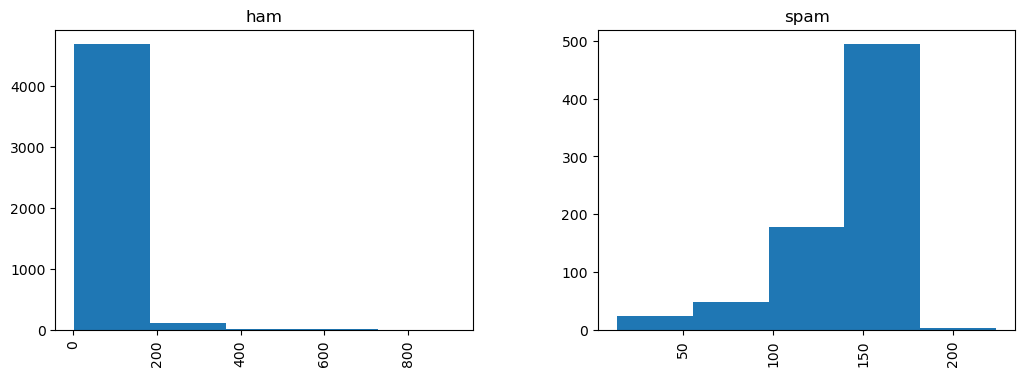

In [4]:
data.hist(column = 'length', by ='label',figsize=(12,4), bins = 5)

In [5]:
# Tokenization
cachedStopWords = stopwords.words("english")

def transform_message(message):
    # Remove puncatuation from the message
    cleaned_message = str(message).translate(str.maketrans("", "", string.punctuation))
    # Split the message into a list of words
    words = cleaned_message.split(" ")
    # Remove stopwords from the message
    filtered_words = [lowered for word in words if (lowered := word.lower()) not in cachedStopWords]
    return filtered_words

In [9]:
# Vectorization
vectorization = CountVectorizer(analyzer = transform_message )
X = vectorization.fit(data['messages'])

X_transform = X.transform(data['messages'])

In [10]:
# TF-IDF
tfidf_transformer = TfidfTransformer().fit(X_transform)
X_tfidf = tfidf_transformer.transform(X_transform)
print(X_tfidf.shape)

(5574, 9533)


In [12]:
# Classification Model

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['label'], test_size=0.30, random_state = 50)    
clf = SVC(kernel='linear').fit(X_train, y_train)

In [ ]:
# Test model

predictions = clf.predict(X_test)
print('predicted', predictions)

In [ ]:
# Is our model reliable?

print (classification_report(y_test, predictions))


In [ ]:
print(confusion_matrix(y_test,predictions))